In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [51]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [52]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

# Dropping Unnecessary Columns 

In [53]:
df.drop(columns=['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'],inplace = True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


# Data Cleaning and Preprocessing

In [54]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [['L','M','H']])
df['Type'] = oe.fit_transform(df[['Type']])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1.0,298.1,308.6,1551,42.8,0,0
1,0.0,298.2,308.7,1408,46.3,3,0
2,0.0,298.1,308.5,1498,49.4,5,0
3,0.0,298.2,308.6,1433,39.5,7,0
4,0.0,298.2,308.7,1408,40.0,9,0


In [55]:
df.dtypes

Type                       float64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

In [56]:
df['Type'].value_counts()

0.0    6000
1.0    2997
2.0    1003
Name: Type, dtype: int64

In [57]:
df['Type'] = df['Type'].astype('int')

In [58]:
df.dtypes

Type                         int32
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

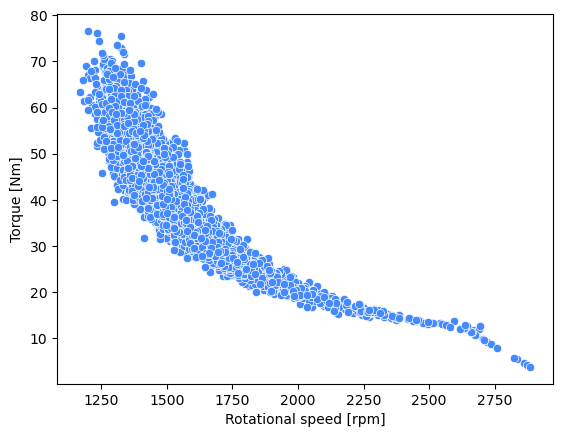

In [59]:
sns.set_palette(['#4589ff','#78a9ff'])
sns.scatterplot(data = df, x = 'Rotational speed [rpm]',y ="Torque [Nm]")
plt.show()

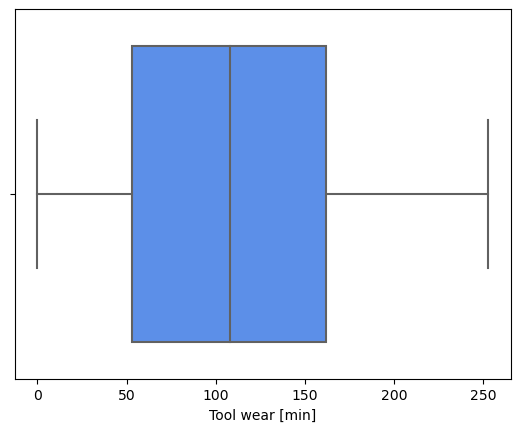

In [60]:
sns.set_palette(['#4589ff','#78a9ff'])
sns.boxplot(data = df,x = 'Tool wear [min]' )
plt.show()

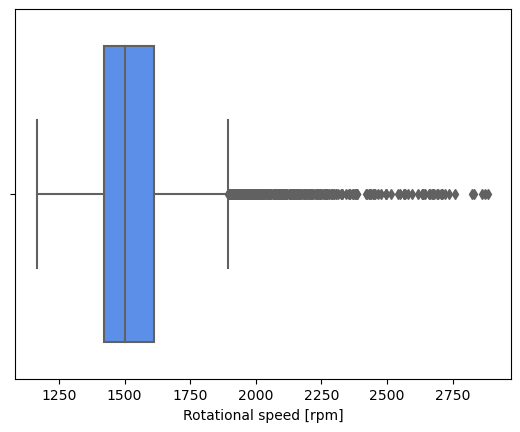

In [61]:
sns.set_palette(['#4589ff','#78a9ff'])
sns.boxplot(data = df,x = 'Rotational speed [rpm]')
plt.show()

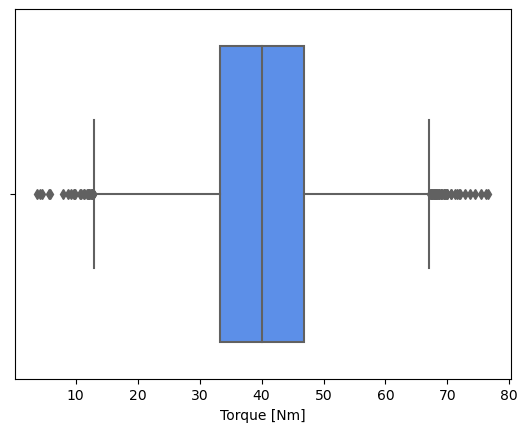

In [62]:
sns.set_palette(['#4589ff','#78a9ff'])
sns.boxplot(data = df,x = 'Torque [Nm]')
plt.show()

In [63]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)
q2 = df['Rotational speed [rpm]'].mean()
iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr
print(maximum,minimum,q2)

1895.5 1139.5 1538.7761


In [64]:
len(df[df['Rotational speed [rpm]'] >= maximum])

418

In [65]:
int(q2)

1538

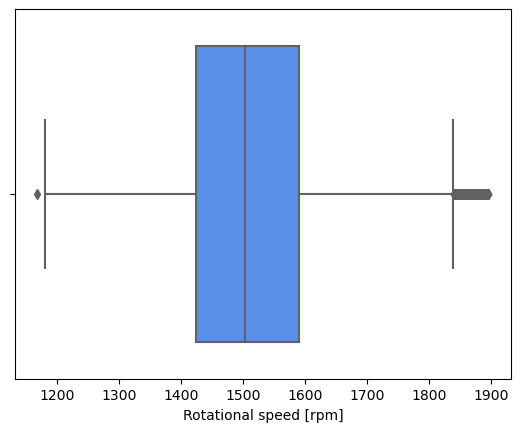

In [66]:
df.loc[df['Rotational speed [rpm]'] > maximum,'Rotational speed [rpm]'] = 1539
sns.boxplot(data = df, x = 'Rotational speed [rpm]')
plt.show()

In [67]:
len(df[df['Rotational speed [rpm]'] >= maximum])
len(df[df['Rotational speed [rpm]'] <= minimum])

0

In [68]:
q1_t = df['Torque [Nm]'].quantile(0.25)
q3_t = df['Torque [Nm]'].quantile(0.75)
q2_t = df['Torque [Nm]'].mean()
iqr_t = q3_t - q1_t
maximum_t = q3_t + 1.5*iqr_t
minimum_t = q1_t - 1.5*iqr_t
print(maximum_t,minimum_t,q2_t)

67.19999999999999 12.800000000000011 39.986909999999995


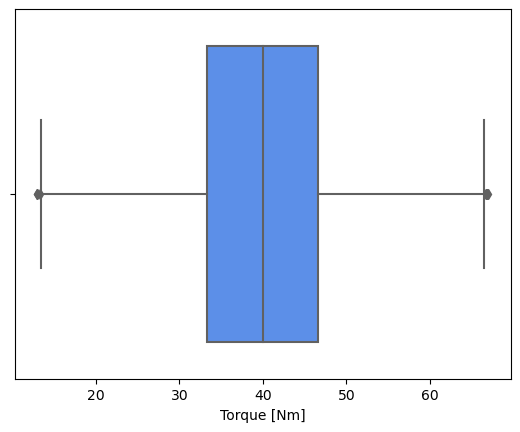

In [69]:
df.loc[df['Torque [Nm]'] > maximum_t,'Torque [Nm]'] = 40
df.loc[df['Torque [Nm]'] < minimum_t,'Torque [Nm]'] = 40
sns.boxplot(data = df, x = 'Torque [Nm]')
plt.show()

In [70]:
print(len(df[df['Torque [Nm]'] <= minimum_t]),len(df[df['Torque [Nm]'] >= maximum_t]))

0 0


In [71]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0
9996,2,298.9,308.4,1632,31.8,17,0
9997,1,299.0,308.6,1645,33.4,22,0
9998,2,299.0,308.7,1408,48.5,25,0


<AxesSubplot:>

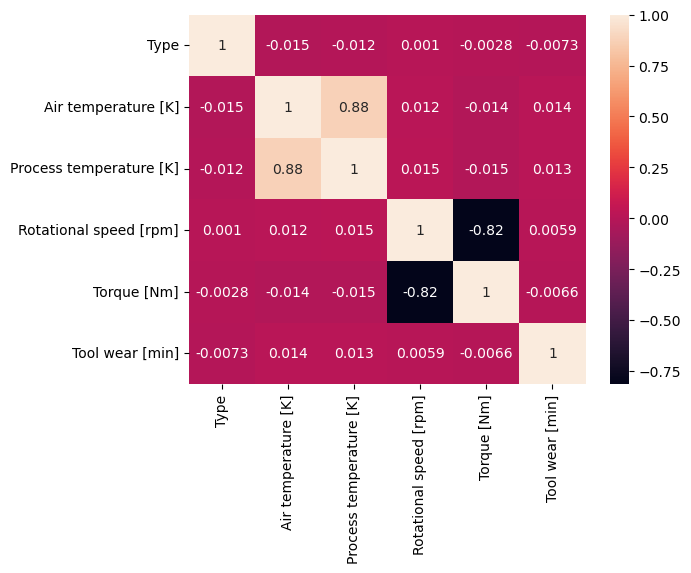

In [72]:
sns.heatmap(df.drop(['Machine failure'],axis = 1).corr(),annot = True)

In [73]:
df['Power'] = round(((2*3.14/60)*df["Rotational speed [rpm]"])*df["Torque [Nm]"],2)
df['Overstrain Failure'] = df['Tool wear [min]']*df['Torque [Nm]']
df['Heat Disspation'] = df['Rotational speed [rpm]']*(df['Process temperature [K]'] - df['Air temperature [K]'])

# Feature Selection 

<AxesSubplot:>

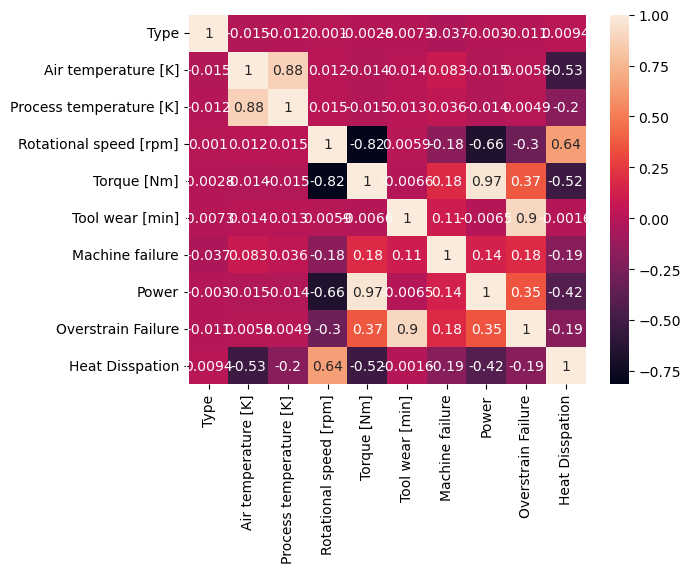

In [74]:
sns.heatmap(df.corr(),annot = True)

In [75]:
x = df.drop(['Machine failure'],axis = 1)
y = df['Machine failure']

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y) 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

featureScores

,Specs,Score
0,Type,12.140890
1,Air temperature [K],0.908855
2,Process temperature [K],0.091749
3,Rotational speed [rpm],3649.480499
4,Torque [Nm],738.786107
5,Tool wear [min],4173.128871
6,Power,40146.895064
7,Overstrain Failure,601297.095415
8,Heat Disspation,98111.132858


In [77]:
df_dropped = df.copy()
df_dropped = df.drop(columns = ['Air temperature [K]','Process temperature [K]'])

# Machine Learning

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=63)
x_train.shape

(8000, 9)

In [79]:
x_drop = df_dropped.drop(['Machine failure'],axis = 1)
y_drop = df_dropped['Machine failure']

x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_drop,y_drop,test_size = 0.2, random_state=42)

## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_dt = DecisionTreeClassifier(criterion='entropy',random_state = 42)
model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict(x_test)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

#DROPPED1

model_dt_drop = DecisionTreeClassifier(criterion='entropy',random_state = 42)
model_dt_drop.fit(x_train_drop,y_train_drop)

y_pred_dt_drop = model_dt_drop.predict(x_test_drop)

print(confusion_matrix(y_test_drop, y_pred_dt_drop))
print(classification_report(y_test_drop,y_pred_dt_drop))



[[1909   16]
 [  17   58]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.78      0.77      0.78        75

    accuracy                           0.98      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.98      0.98      0.98      2000

[[1912   27]
 [  19   42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.61      0.69      0.65        61

    accuracy                           0.98      2000
   macro avg       0.80      0.84      0.82      2000
weighted avg       0.98      0.98      0.98      2000



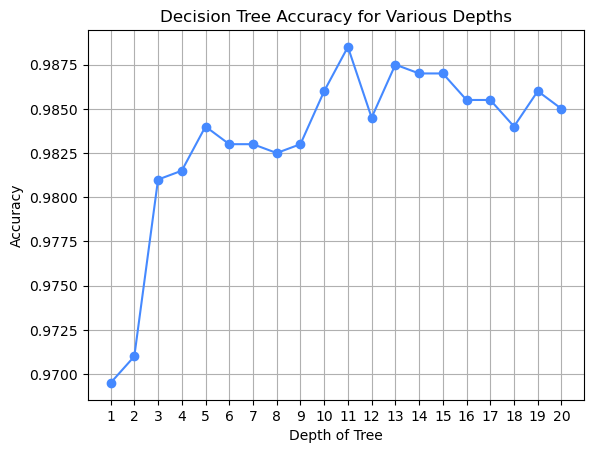

In [81]:
from sklearn.tree import DecisionTreeClassifier

depths = range(1, 21)
accuracies = []

for depth in depths:
    # Train a decision tree classifier with the current depth
    model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state = 42)
    model_dt.fit(x_train,y_train)
    
    # Make predictions on the test set
    y_pred = model_dt.predict(x_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy for different depths
plt.plot(depths, accuracies, marker='o')
plt.title('Decision Tree Accuracy for Various Depths')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [82]:
model_dt_best = DecisionTreeClassifier(criterion='entropy',max_depth = 11, random_state = 42)
model_dt_best.fit(x_train,y_train)

y_pred_dt_best = model_dt_best.predict(x_test)

print(confusion_matrix(y_test, y_pred_dt_best))
print(classification_report(y_test,y_pred_dt_best))

[[1917    8]
 [  15   60]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1925
           1       0.88      0.80      0.84        75

    accuracy                           0.99      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.99      0.99      0.99      2000



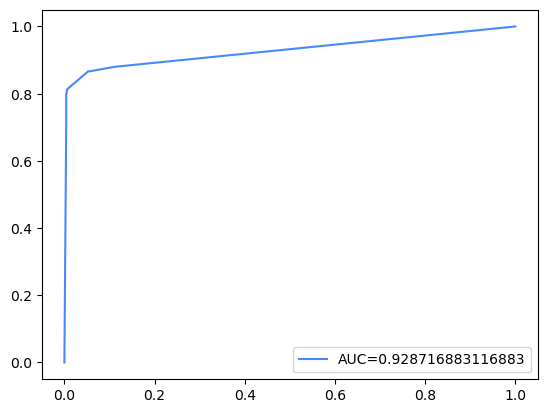

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_proba_dt = model_dt_best.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,  y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr_dt,tpr_dt, label = "AUC="+str(auc_dt))
plt.legend(loc=4)
plt.show()

In [84]:
optimal_idx_dt = np.argmax(tpr_dt - fpr_dt)
optimal_threshold_dt = thresholds_dt[optimal_idx_dt]
print(optimal_threshold_dt)

0.06451612903225806


In [85]:
y_probs_dt = model_dt_best.predict_proba(x_test)[:, 1]
y_pred_threshold_dt = ( y_probs_dt > 0.1).astype(int)
print(classification_report(y_test,y_pred_threshold_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.84      0.81      0.82        75

    accuracy                           0.99      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.99      0.99      0.99      2000



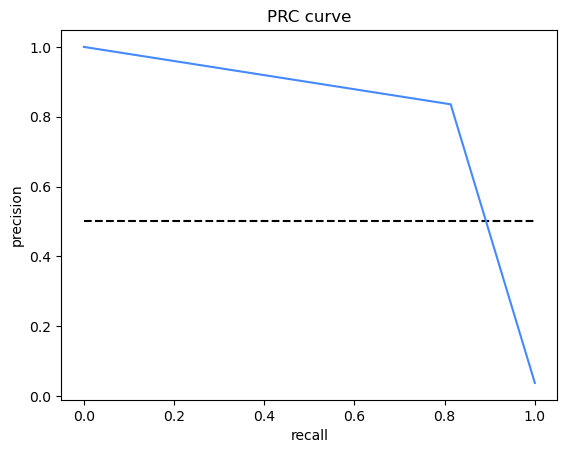

In [86]:
from sklearn.metrics import precision_recall_curve
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_threshold_dt)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_dt, precision_dt, label = 'dt')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [87]:
auc_prc_dt = auc(recall_dt, precision_dt)
print(auc_prc_dt)

0.8279748858447489


## KNN

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalerMinMax = MinMaxScaler()
x_train_scaled = scalerMinMax.fit_transform(x_train)
x_test_scaled = scalerMinMax.transform(x_test)

scalerMinMax1 = MinMaxScaler()
x_train_scaled_drop = scalerMinMax1.fit_transform(x_train_drop)
x_test_scaled_drop = scalerMinMax1.transform(x_test_drop)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y_pred_knn = knn.predict(x_test_scaled)

In [91]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[1924    1]
 [  65   10]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1925
           1       0.91      0.13      0.23        75

    accuracy                           0.97      2000
   macro avg       0.94      0.57      0.61      2000
weighted avg       0.97      0.97      0.95      2000



In [92]:
y_probs = knn.predict_proba(x_test_scaled)[:, 1]
y_pred_threshold = ( y_probs > 0.25).astype(int)
print(classification_report(y_test,y_pred_threshold))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1925
           1       0.66      0.47      0.55        75

    accuracy                           0.97      2000
   macro avg       0.82      0.73      0.77      2000
weighted avg       0.97      0.97      0.97      2000



Text(0, 0.5, 'Accuracy Score')

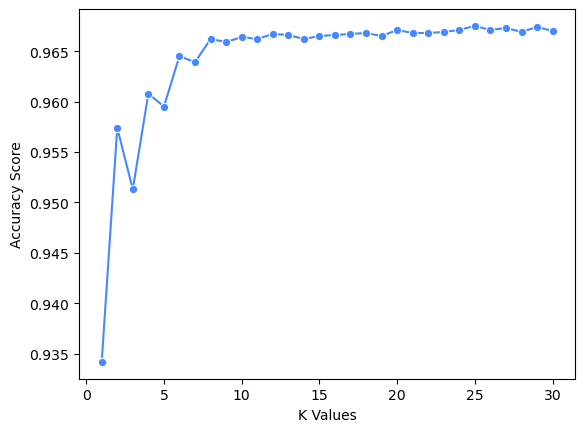

In [93]:
from sklearn.model_selection import cross_val_score
x_scaled = scalerMinMax.fit_transform(x)

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_scaled, y, cv=5)
    scores.append(np.mean(score))


sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

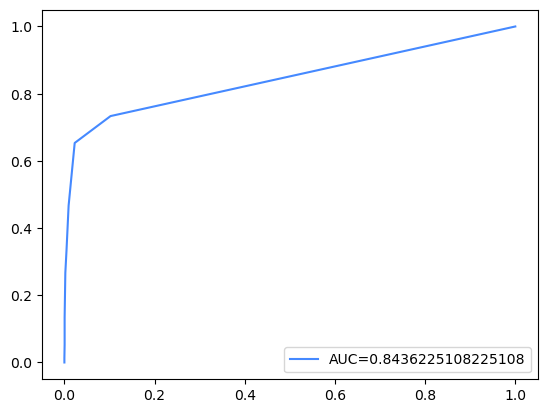

In [94]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaled,y_train)
y_pred_proba_knn = knn.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba_knn)
auc = roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [95]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1

In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=5)

array([0.9725, 0.9685, 0.9695, 0.971 , 0.972 ])

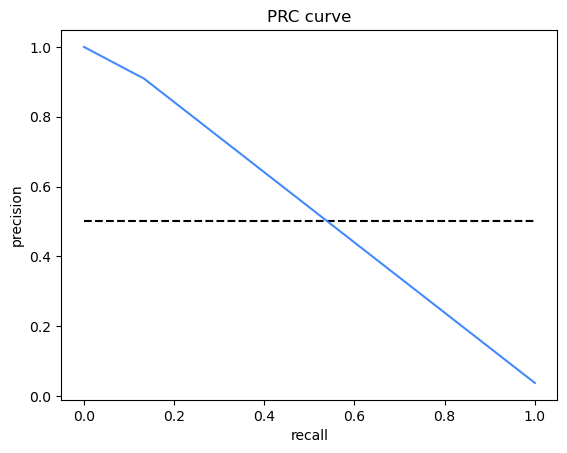

In [97]:
from sklearn.metrics import precision_recall_curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_knn)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_knn, precision_knn, label = 'dt')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16,C= 10, penalty='l2')

# ,C= 10, penalty='l2'
logreg.fit(x_train_scaled, y_train)

y_pred_log = logreg.predict(x_test_scaled)

print(classification_report(y_test,y_pred_log))
cnf_log = confusion_matrix(y_test,y_pred_log)
print(cnf_log)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1925
           1       0.67      0.03      0.05        75

    accuracy                           0.96      2000
   macro avg       0.82      0.51      0.52      2000
weighted avg       0.95      0.96      0.95      2000

[[1924    1]
 [  73    2]]


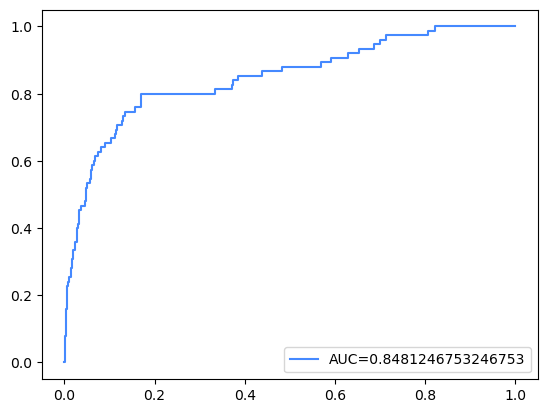

In [101]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_proba_log = logreg.predict_proba(x_test_scaled)[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test,  y_pred_proba_log)
auc_log = roc_auc_score(y_test, y_pred_proba_log)
plt.plot(fpr_log,tpr_log, label = "AUC="+str(auc_log))
plt.legend(loc=4)
plt.show()

In [102]:
optimal_idx_log = np.argmax(tpr_log - fpr_log)
optimal_threshold_log = thresholds_log[optimal_idx_log]
print(optimal_threshold_log)

0.044668093316254424


In [103]:
cvs = cross_val_score(logreg,x,y,cv=5).mean()
cvs

0.9672000000000001

In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization strength
}
log_cv = GridSearchCV(LogisticRegression(), param_grid, cv=5,n_jobs = -1)
log_cv.fit(x_train, y_train)
log_cv.best_params_

C:\Users\panch\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\panch\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\panch\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\panch\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1168,

{'C': 10, 'penalty': 'l2'}

## Gaussian Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [106]:
y_pred_nb = nb.predict(x_test)
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1925
           1       0.30      0.51      0.38        75

    accuracy                           0.94      2000
   macro avg       0.64      0.73      0.67      2000
weighted avg       0.95      0.94      0.95      2000

[[1838   87]
 [  37   38]]


In [107]:
cvs = cross_val_score(nb,x,y,cv=5).mean()
cvs

0.908

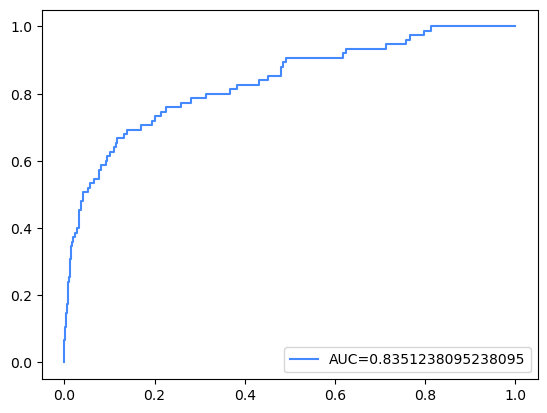

In [108]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_proba_nb = nb.predict_proba(x_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,  y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr_nb,tpr_nb, label = "AUC="+str(auc_nb))
plt.legend(loc=4)
plt.show()

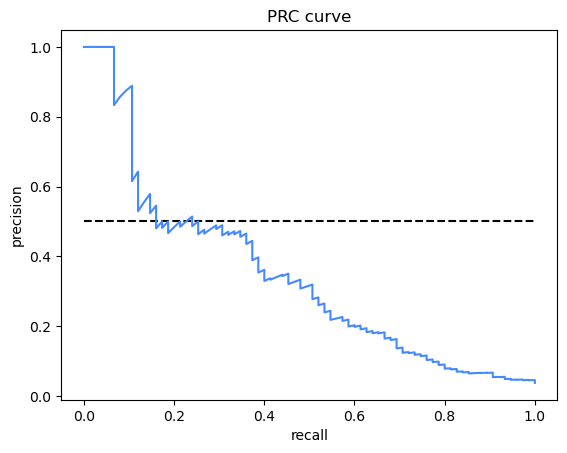

In [109]:
from sklearn.metrics import precision_recall_curve
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, y_pred_proba_nb)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_nb, precision_nb, label = 'nb')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [110]:
auc_prc_nb = auc(recall_nb, precision_nb)
print(auc_prc_nb)

0.3418005349245468


## Bagging

### Random values

In [111]:
# from sklearn.ensemble import BaggingClassifier

# bag = BaggingClassifier(
#     estimator=DecisionTreeClassifier(),
#     n_estimators=500,
#     max_samples=0.25,
#     bootstrap=True,
#     random_state=42,oob_score=True
# )

In [112]:
# bag.fit(x_train,y_train)

In [113]:
# y_pred_bag = bag.predict(x_test)

In [114]:
# print(classification_report(y_test,y_pred_bag))

In [115]:
# bag.oob_score_

In [116]:
# from sklearn.metrics import precision_recall_curve
# precision_bag, recall_bag, thresholds_bag = precision_recall_curve(y_test, y_pred_bag)


# plt.plot([0, 1], [0.5, 0.5],'k--')
# plt.plot(recall_bag, precision_bag, label = 'nb')
# plt.xlabel('recall')
# plt.ylabel('precision')
# plt.title('PRC curve')
# plt.show()

### GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
# parameters = {
#     'n_estimators': [50,100,500], 
#     'max_samples': [0.1,0.5,0.75,1.0],
#     'bootstrap' : [True,False],
#     'max_features' : [0.1,0.5,0.75,1.0]
#     }

In [119]:
# search = GridSearchCV(BaggingClassifier(), parameters, cv=5,n_jobs = -1)

In [120]:
# search.fit(x_train,y_train)

In [121]:
# search.best_params_


In [122]:
# search.best_score_

In [123]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.75,
    bootstrap=True,
    max_features = 1.0,
    random_state=42,oob_score=True
)

In [124]:
bag.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.75,
                  n_estimators=100, oob_score=True, random_state=42)

In [125]:
y_pred_bag = bag.predict(x_test)

In [126]:
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1925
           1       0.95      0.81      0.88        75

    accuracy                           0.99      2000
   macro avg       0.97      0.91      0.94      2000
weighted avg       0.99      0.99      0.99      2000



In [127]:
print(confusion_matrix(y_test,y_pred_bag))

[[1922    3]
 [  14   61]]


In [128]:
bag.oob_score_

0.989

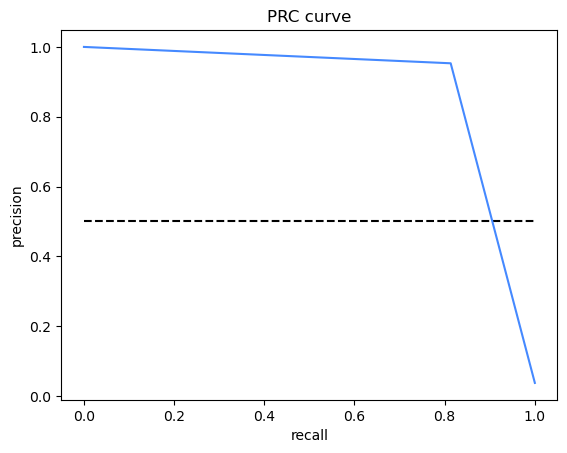

In [129]:
from sklearn.metrics import precision_recall_curve
precision_bag, recall_bag, thresholds_bag = precision_recall_curve(y_test, y_pred_bag)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_bag, precision_bag, label = 'nb')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [130]:
auc_prc_bag = auc(recall_bag, precision_bag)
print(auc_prc_bag)

0.8867291666666667


### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier()

In [133]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
y_pred_rf = rf.predict(x_test)

In [135]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1922    3]
 [  14   61]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1925
           1       0.95      0.81      0.88        75

    accuracy                           0.99      2000
   macro avg       0.97      0.91      0.94      2000
weighted avg       0.99      0.99      0.99      2000



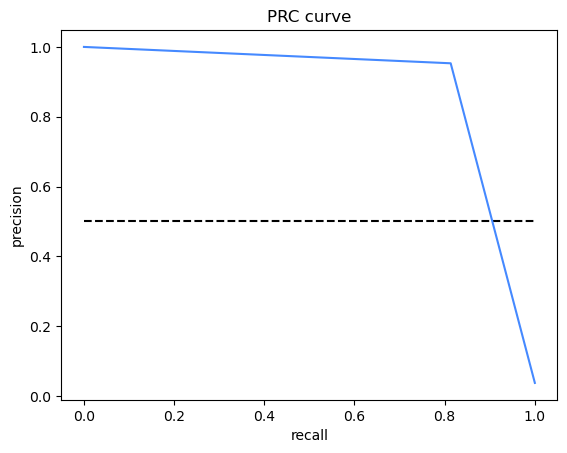

In [136]:
from sklearn.metrics import precision_recall_curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_rf, precision_rf, label = 'rf')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [137]:
auc_prc_rf = auc(recall_rf, precision_rf)
print(auc_prc_rf)

0.8867291666666667


In [138]:
np.mean(cross_val_score(rf,x,y,scoring='recall',cv=10))

0.7200534759358289

#### GridSearchCV - Random Forest

In [139]:
# params_grid = {"n_estimators" : [20,50,100],
#                "max_depth" : [7,11,None],
#                "max_samples" : [0.25,0.5,0.7]
    
# }

In [140]:
# rf_cv = RandomForestClassifier()

# rf_grid = GridSearchCV(estimator = rf_cv, 
#                        param_grid = params_grid, 
#                        cv = 5,  
#                        n_jobs = -1)

In [141]:
# rf_grid.fit(x_train,y_train)

In [142]:
# rf_grid.best_params_

In [143]:
# rf_grid.best_score_

In [144]:
rf_cv = RandomForestClassifier(max_samples = 0.7,n_estimators = 100)

In [145]:
rf_cv.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.7)

In [146]:
y_pred_rf_cv = rf_cv.predict(x_test)

In [147]:
print(confusion_matrix(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))

[[1924    1]
 [  16   59]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1925
           1       0.98      0.79      0.87        75

    accuracy                           0.99      2000
   macro avg       0.99      0.89      0.93      2000
weighted avg       0.99      0.99      0.99      2000



In [148]:
np.mean(cross_val_score(rf_cv,x,y,scoring='recall',cv=10))

0.7141711229946524

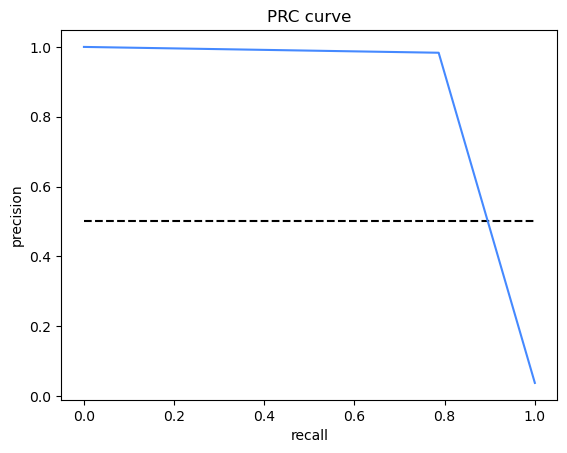

In [149]:
from sklearn.metrics import precision_recall_curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf_cv)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_rf, precision_rf, label = 'rf')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

### AdaBoost

In [150]:
from sklearn.ensemble import AdaBoostClassifier

In [151]:
ab = AdaBoostClassifier()

In [152]:
ab.fit(x_train, y_train)

AdaBoostClassifier()

In [153]:
y_pred_ab = ab.predict(x_test)

In [154]:
print(confusion_matrix(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

[[1915   10]
 [  42   33]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1925
           1       0.77      0.44      0.56        75

    accuracy                           0.97      2000
   macro avg       0.87      0.72      0.77      2000
weighted avg       0.97      0.97      0.97      2000



In [155]:
# from sklearn.model_selection import GridSearchCV

# grid = {'n_estimators': [10, 50, 100, 500],
#         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
#         'algorithm' : ['SAMME', 'SAMME.R']
    
# }


# grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10)
# grid_search.fit(x_train, y_train)

In [156]:
# grid_search.best_params_

In [157]:
# grid_search.best_score_

In [158]:
ab_cv = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, n_estimators= 500)

In [159]:
ab_cv.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=500)

In [160]:
y_pred_abcv = ab_cv.predict(x_test)

In [161]:
print(confusion_matrix(y_test, y_pred_abcv))
print(classification_report(y_test, y_pred_abcv))

[[1907   18]
 [  28   47]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1925
           1       0.72      0.63      0.67        75

    accuracy                           0.98      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.98      0.98      0.98      2000



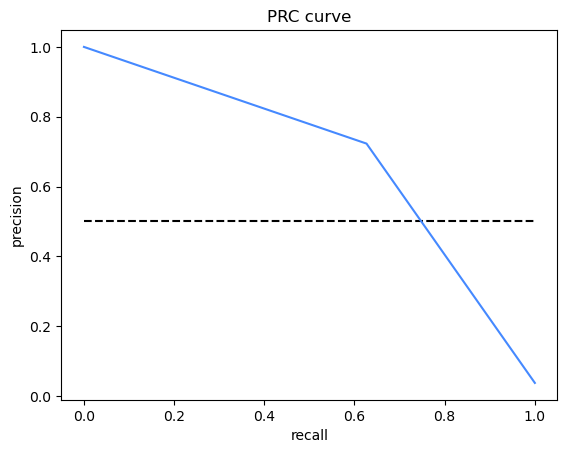

In [162]:
from sklearn.metrics import precision_recall_curve
precision_ab, recall_ab, thresholds_ab = precision_recall_curve(y_test, y_pred_abcv)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_ab, precision_ab, label = 'rf')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [163]:
auc_prc_ab = auc(recall_ab, precision_ab)
print(auc_prc_ab)

0.681871794871795


In [164]:
np.mean(cross_val_score(ab_cv,x,y,scoring='recall',cv=10))

### XGBoost

In [165]:
df.rename(columns={'Air temperature [K]': 'Air temperature', 
                   'Process temperature [K]': 'Process temperature', 
                   'Rotational speed [rpm]': 'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'}, 
          inplace=True)

In [166]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power,Overstrain Failure,Heat Disspation
0,1,298.1,308.6,1551,42.8,0,0,6948.07,0.0,16285.5
1,0,298.2,308.7,1408,46.3,3,0,6823.26,138.9,14784.0
2,0,298.1,308.5,1498,49.4,5,0,7745.46,247.0,15579.2
3,0,298.2,308.6,1433,39.5,7,0,5924.50,276.5,14903.2
4,0,298.2,308.7,1408,40.0,9,0,5894.83,360.0,14784.0


In [167]:
x = df.drop(['Machine failure'],axis = 1)
y = df['Machine failure']

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=63)
x_train.shape

(8000, 9)

In [169]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state = 40)
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)
y_pred_train = xgb_model.predict(x_train)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(classification_report(y_train, y_pred_train))

[[1923    2]
 [  13   62]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1925
           1       0.97      0.83      0.89        75

    accuracy                           0.99      2000
   macro avg       0.98      0.91      0.94      2000
weighted avg       0.99      0.99      0.99      2000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7736
           1       1.00      1.00      1.00       264

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [170]:
np.mean(cross_val_score(xgb_model,x,y,scoring='recall',cv=10))

0.6286096256684492

In [171]:
from sklearn.model_selection import GridSearchCV

grid_xgb = {'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1.0],
        'colsample_bytree':[0.5,0.8,None],
            'subsample':[0.5,0.8,None]   
}

In [172]:
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(objective= 'binary:logistic'), param_grid=grid_xgb,scoring='recall' ,n_jobs=-1, cv=10)

In [173]:
grid_search_xgb.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8, None],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, None]},
             scoring='recall')

In [174]:
grid_search_xgb.best_params_

{'colsample_bytree': None,
 'learning_rate': 0.1,
 'n_estimators': 50,
 'subsample': None}

In [175]:
grid_search_xgb.best_score_

0.7425925925925927

In [176]:
xgb_cv = xgb.XGBClassifier(colsample_bytree= None,
 learning_rate= 0.1,
 n_estimators= 50,
 subsample= None,objective= 'binary:logistic',random_state=43)

In [177]:
xgb_cv.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=43, ...)

In [178]:
y_predcv = xgb_cv.predict(x_test)

In [179]:
print(confusion_matrix(y_test, y_predcv))
print(classification_report(y_test, y_predcv))

[[1924    1]
 [  15   60]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1925
           1       0.98      0.80      0.88        75

    accuracy                           0.99      2000
   macro avg       0.99      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000



In [180]:
np.mean(cross_val_score(xgb_cv,x,y,scoring='recall',cv=10))

0.6611408199643494

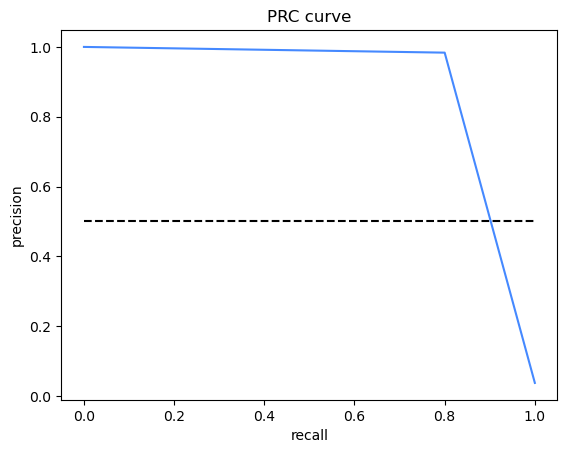

In [181]:
from sklearn.metrics import precision_recall_curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_predcv)


plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_xgb, precision_xgb, label = 'rf')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

In [182]:
auc_prc_xgb = auc(recall_xgb, precision_xgb)
print(auc_prc_xgb)

0.8955532786885246
